<a href="https://colab.research.google.com/github/mokshmahajan2004/Stock-Prediction-Model/blob/main/Stock_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [2]:
# Import the libraries
import math
import pandas_datareader as web
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get the stock quote
# df = web.DataReader('AAPL',start='2016-01-01',end='2023-12-17')
df = yf.download('AAPL', start='2016-01-01', end='2024-06-09')
#Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,23.914478,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.315203,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.858931,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,21.894175,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.009954,283192000
...,...,...,...,...,...,...
2024-06-03,192.899994,194.990005,192.520004,194.029999,194.029999,50080500
2024-06-04,194.639999,195.320007,193.029999,194.350006,194.350006,47471400
2024-06-05,195.399994,196.899994,194.869995,195.869995,195.869995,54156800


In [4]:
#Get the number of rows and columns in the dataset
df.shape

(2122, 6)

Text(0, 0.5, 'Close Price USD ($)')

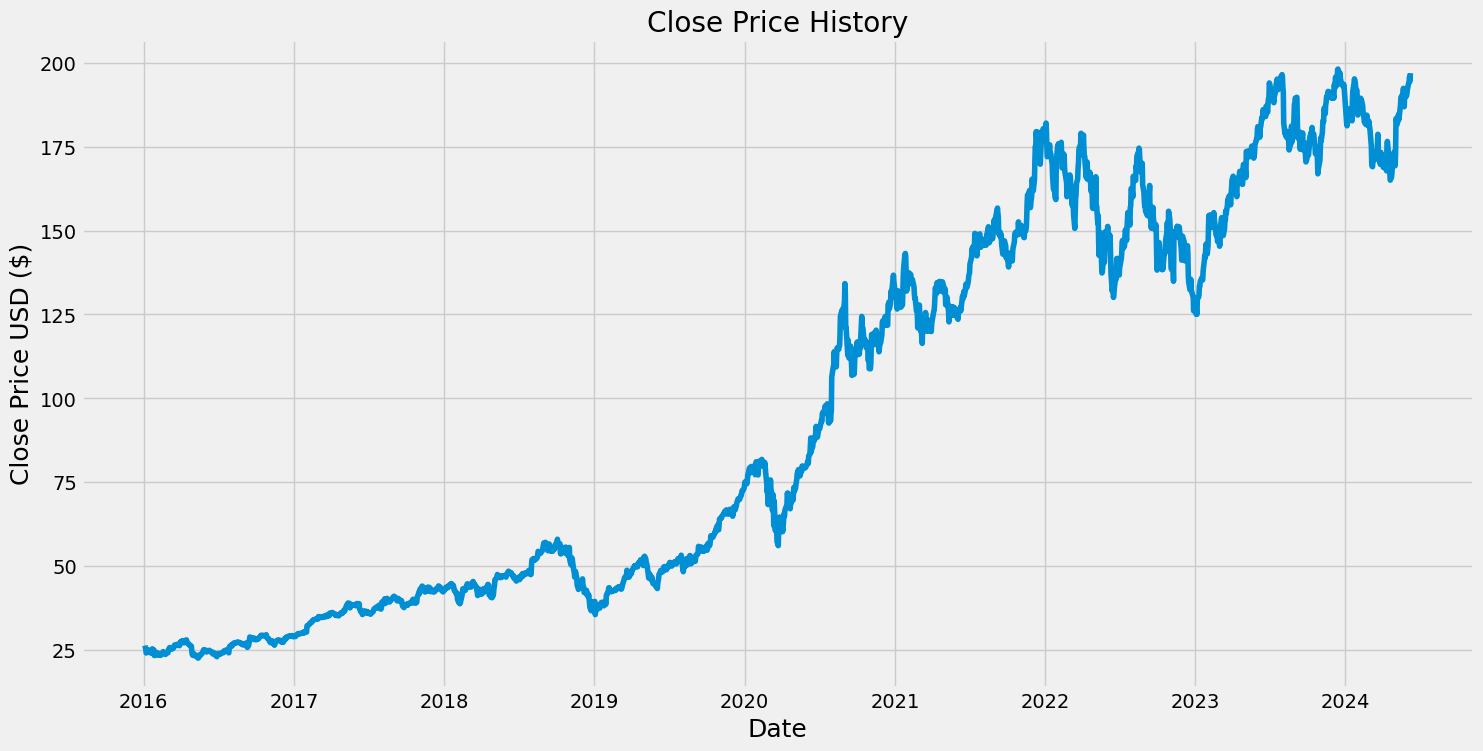

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)

In [7]:
#Create a new dataframe with only the 'Close Column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1698